In [2]:
## LOAD MODULES ##
# Third Party
import sys
import matplotlib.pyplot as plt
import numpy as np
import sys
from pathlib import Path
import psyplot.project as psy
import pandas as pd
import xarray
from netCDF4 import Dataset,date2num
import xarray as xr
from matplotlib import cm
import datetime as dt
from iconarray.plot import formatoptions # import plotting formatoptions (for use with psyplot)
import iconarray as iconvis # import self-written modules from iconarray

# First Party
sys.path.append('../utilities_tlezuo/')
# from timefunctions import *
import varfunctions as vf
import locfunctions as lf
import get_stations_timeseries as gs

INFO:numexpr.utils:Note: NumExpr detected 36 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [3]:
###############################################################################################
## CONSTANT FILE  ##
c_filename = "lfff00000000c.nc"
filepath = '/store/s83/swester/teamx/tdf_2019091212/output/19091212/'
const_file = filepath + c_filename
data_c = psy.open_dataset(const_file)

###############################################################################################
## DECIDE ##
# where to save
loadpath = '/users/tlezuo/icon-vis/height_time_diagrams/data/'

# decide which variables to calculate
# 3D
pvars_list= [vf.U, vf.V, vf.T, vf.QV,vf.P,vf.VEL,vf.DIR]
# 2D
spvars_list=[vf.T_2M,vf.VEL_10M,vf.DIR_10M,vf.TKEs]#,vf.SW_d]

# decide which location to plot
loc=lf.hoch
stat=lf.hoch_stat

###############################################################################################
## DATELISTS ##
# ICON model: as writeout times: 30 min
startdate_model = dt.datetime(2019,9,12,12,00)
enddate_model = dt.datetime(2019,9,14,00,00)
plotdates_model = pd.date_range(startdate_model,enddate_model,freq='0h30min')
# radiosoundings: 3h and 2h intervals
plotdates_rs = [dt.datetime(2019,9,12,23,00),dt.datetime(2019,9,13,3,00),dt.datetime(2019,9,13,6,00),dt.datetime(2019,9,13,9,00),
dt.datetime(2019,9,13,11,00),dt.datetime(2019,9,13,13,00),dt.datetime(2019,9,13,15,00),dt.datetime(2019,9,13,17,00),dt.datetime(2019,9,13,20,00),dt.datetime(2019,9,13,23,00)]
# lidar SR88: 10 min
plotdates_lidar = pd.date_range(startdate_model,enddate_model,freq='0h10min')

###############################################################################################
## LOAD DATA ICON HTD ##
# ICON model
htd_data_model = np.load(loadpath+'htd_ICON_'+loc.name+'.npy',allow_pickle='TRUE').item()

###############################################################################################
## LOAD DATA ICON TS ##
ts_data_icon = np.load(loadpath+'ts_ICON_'+loc.name+'.npy',allow_pickle='TRUE').item()

###############################################################################################
## LOAD DATA STATION ##
ts_data_stat = gs.read_acinn(loc=loc, 
                    vars=spvars_list,
                    path_ACINN= '/users/tlezuo/data/stations/ACINNiBox',
                    start_time = startdate_model.strftime("%Y-%m-%d %H:%M:%S"),
                    end_time = enddate_model.strftime("%Y-%m-%d %H:%M:%S"),
                    correct_direction=True)
ts_data_stat['dt'] = pd.to_datetime(ts_data_stat["timestamp"])


3
found T_2M as tair2 in /users/tlezuo/data/stations/ACINNiBox/acinn_data_i-Box Hochhaueser_FLUXL12_1f7675db/data.csv
found VEL_10M as meanu2 in /users/tlezuo/data/stations/ACINNiBox/acinn_data_i-Box Hochhaueser_FLUXL12_1f7675db/data.csv
found DIR_10M as wind_dir2 in /users/tlezuo/data/stations/ACINNiBox/acinn_data_i-Box Hochhaueser_FLUXL12_1f7675db/data.csv
found TKEs as meantke1 in /users/tlezuo/data/stations/ACINNiBox/acinn_data_i-Box Hochhaueser_FLUXL12_1f7675db/data.csv


In [4]:
# ts_data_stat=ts_data_stat[:,~ts_data_stat.columns.duplicated()]

In [5]:
ts_data_stat

,T_2M,VEL_10M,DIR_10M,TKEs,timestamp,dt
rawdate,,,,,,
2019-09-12 12:15:00,17.8,1.6446,3.5137,0.3777,2019-09-12 12:15:00,2019-09-12 12:15:00
2019-09-12 12:45:00,18.4,1.1611,25.1089,0.3,2019-09-12 12:45:00,2019-09-12 12:45:00
2019-09-12 13:15:00,19.2,0.9031,47.469,0.2593,2019-09-12 13:15:00,2019-09-12 13:15:00
2019-09-12 13:45:00,19.9,0.6963,95.3714,0.1252,2019-09-12 13:45:00,2019-09-12 13:45:00
2019-09-12 14:15:00,20.2,1.2285,121.664,0.1429,2019-09-12 14:15:00,2019-09-12 14:15:00
...,...,...,...,...,...,...
2019-09-13 21:45:00,16.1,0.6983,183.122,0.2116,2019-09-13 21:45:00,2019-09-13 21:45:00
2019-09-13 22:15:00,15.3,0.748,188.692,0.2308,2019-09-13 22:15:00,2019-09-13 22:15:00
2019-09-13 22:45:00,14.7,1.0715,240.191,0.1321,2019-09-13 22:45:00,2019-09-13 22:45:00


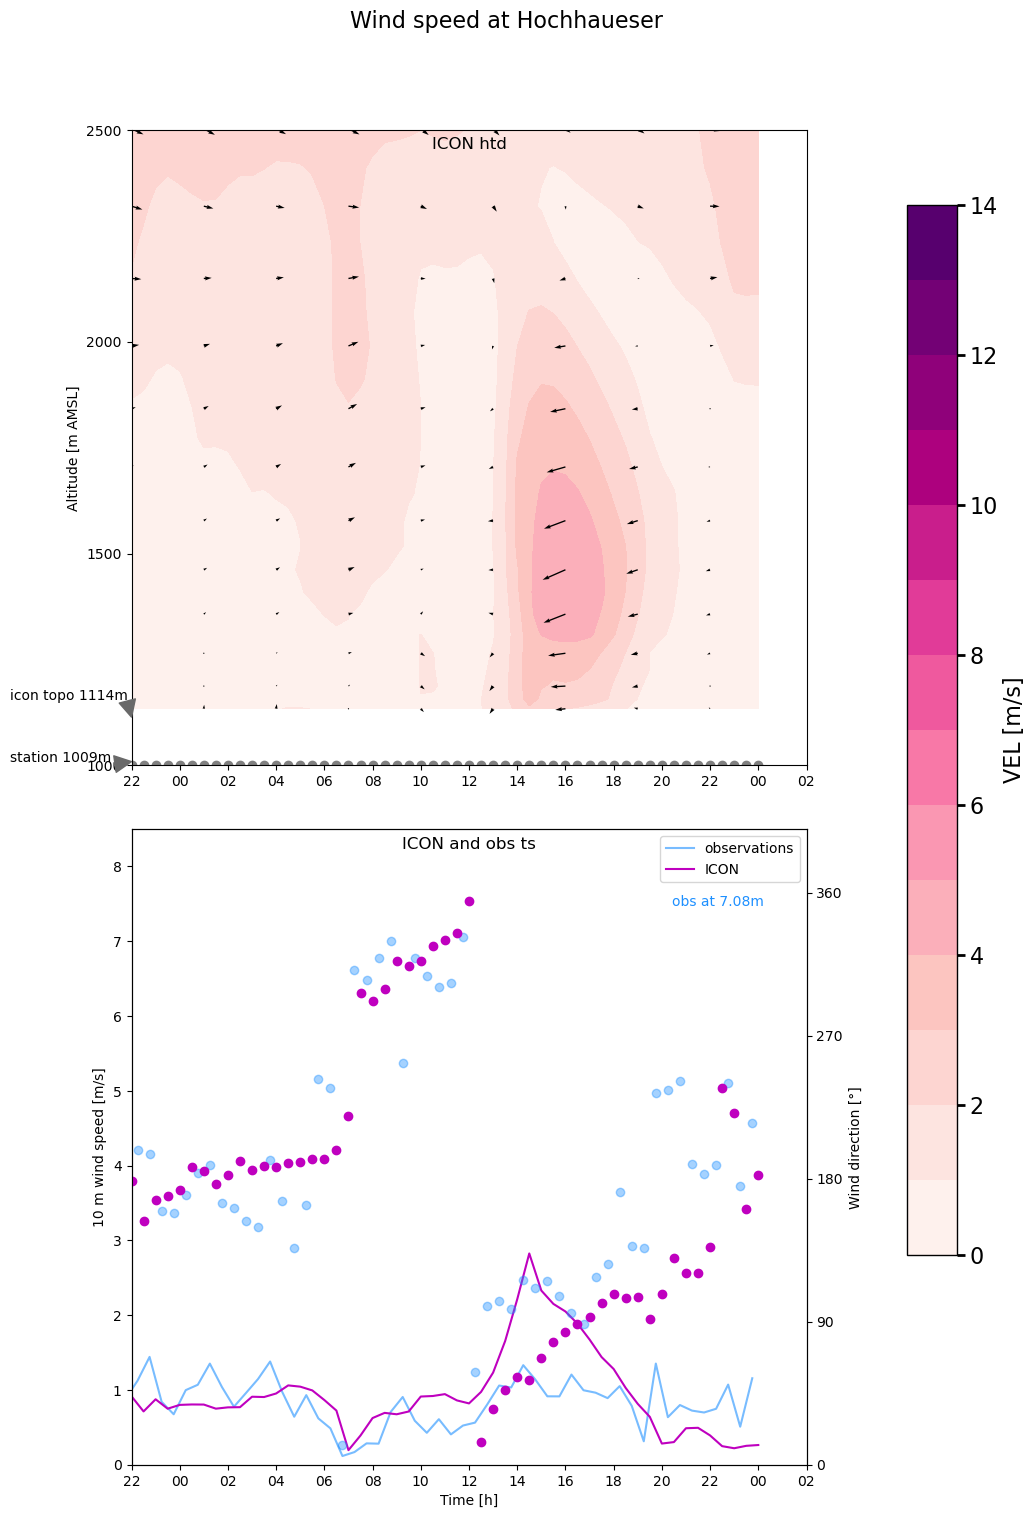

In [6]:
## PLOT LIDAR PLOT MODEL + STATION TIMESERIES ##
# select variable
pvar=vf.VEL
spvar=vf.VEL_10M

# vertical range lidar
zmin = int(stat.alt/ 100)*100
zmax = zmin+1500
altitudes = np.arange(zmin,zmax+1,500)

# time range
startdate_plot = dt.datetime(2019,9,12,22,00)
enddate_plot = dt.datetime(2019,9,14,2,00)
plotfreq_plot = '2h0min'
plotdates_plot = pd.date_range(startdate_plot,enddate_plot,freq=plotfreq_plot)

# colorscale levels
levels = np.arange(pvar.min,pvar.max,pvar.ticks)
# h2500
if zmax == 2000:
        if pvar.name == 'T':
                levels = np.arange(285,306,2)
        if pvar.name == 'VEL':
                levels = np.arange(0,15,1)

# figure settings
fig, (ax_htd, ax_ts) = plt.subplots(2,1, figsize=(10,15))
plt.subplots_adjust(bottom=0.01, right=0.8, top=0.9,hspace=0.1)
fig.suptitle(pvar.title+' at '+loc.name, fontsize=16)

# windbarb settings
q_scale = 20
q_width = 0.002

##################################################################################################
## ICON MODEL HTD ##
x1 = plotdates_model
if pvar.modlev == 80:
        y1 = htd_data_model['HFL_loc']
elif pvar.modlev == 81:
        y1 = htd_data_model['HHL_loc']
y1_wind = htd_data_model['HFL_loc']
z1 = np.transpose(htd_data_model[pvar.name])
u1 = np.transpose(htd_data_model['U'])
v1 = np.transpose(htd_data_model['V'])

#create plot
# colormap
cf = ax_htd.contourf(x1,y1,z1, levels = levels, cmap=pvar.cmap)
# windbarbs
x1, y1_wind = np.meshgrid(x1, y1_wind)
dx1 = 6 # dx/2= hours for model
dy1 = 2
ax_htd.quiver(x1[::dy1, 2::dx1], y1_wind[::dy1, 2::dx1], u1[::dy1, 2::dx1], v1[::dy1, 2::dx1], 
        scale=q_scale, scale_units='inches', width=q_width)     
# datapoints
ax_htd.scatter(plotdates_model,np.full((len(plotdates_model),1),zmin),color='grey')

# plotting options
ax_htd.set_ylim(zmin,zmax)
ax_htd.set_xlim(startdate_plot,enddate_plot)
# ax_htd.grid()
ax_htd.set_title('ICON htd', y=1.0, pad=-14)
# ax_htd.set_xlabel('Time [h]')
ax_htd.set_xticks(plotdates_plot)
ax_htd.set_xticklabels(labels=[j.strftime('%H') for j in plotdates_plot])
ax_htd.set_ylabel('Altitude [m AMSL]')
ax_htd.set_yticks(altitudes)
# annotate altitudes
ax_htd.annotate('station '+str(stat.alt)+'m', xy=(0,stat.alt),xytext=(-0.18,stat.alt),xycoords=('axes fraction','data'),
arrowprops=dict(width= 2,color='dimgrey'))
# ax_htd.annotate('HHL '+str(stat.iconHHL)+'m', xy=(0,stat.iconHHL),xytext=(-0.18,stat.iconHHL),xycoords=('axes fraction','data'),
# arrowprops=dict(width= 2,color='dimgrey'))
ax_htd.annotate('icon topo '+str(stat.iconalt)+'m', xy=(0,stat.iconalt),xytext=(-0.18,stat.iconalt+40),xycoords=('axes fraction','data'),
arrowprops=dict(width= 2,color='dimgrey'))

# add colorbar 
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
cbar = fig.colorbar(cf, cax=cbar_ax)
# cbar = plt.colorbar(cf,orientation='vertical')
cbar.ax.tick_params(labelsize=16,width=2,length=6)
cbar.set_label(pvar.name+' '+pvar.units,fontsize=16)
cbar.outline.set_linewidth(1)

##################################################################################################
## TIMESERIES ##
# OBS
ax_ts.plot(ts_data_stat['dt'],np.transpose(ts_data_stat[spvar.name]),color='dodgerblue',alpha=0.6, label='observations')

# ICON 
ax_ts.plot(plotdates_model,ts_data_icon[spvar.name],color='m',label='ICON')

# plotting options
ax_ts.set_ylim(spvar.min,spvar.max)
ax_ts.set_xlim(startdate_plot,enddate_plot)
# ax_ts.grid()
ax_ts.set_title('ICON and obs ts', y=1.0, pad=-14)
ax_ts.set_xlabel('Time [h]')
ax_ts.set_xticks(plotdates_plot)
# ax_ts.set_xticklabels(labels=[j.strftime('%H') for j in plotdates_plot])
ax_ts.set_ylabel(spvar.title+' '+spvar.units)
ax_ts.legend()
ax_ts.annotate('obs at '+str(stat.hdict[spvar.name])+'m', xy=(0.8,0.2),xytext=(0.8,0.88),xycoords=('axes fraction','axes fraction'),color='dodgerblue')

##################################################################################################
# ## DIR if VEL is plotted ##
if spvar.name == 'VEL_10M':
        # plot
        ax_ts_2 = ax_ts.twinx()
        ax_ts_2.scatter(ts_data_stat['dt'],np.transpose(ts_data_stat['DIR_10M']),color='dodgerblue',alpha=0.4) # station obs
        ax_ts_2.scatter(plotdates_model,ts_data_icon['DIR_10M'],color='m') # model

        # plotting options
        ax_ts_2.set_ylim(0,400)
        ax_ts_2.set_yticks(np.arange(0,365,90))
        ax_ts_2.set_ylabel('Wind direction [°]')
        ax_ts_2.set_xlim(startdate_plot,enddate_plot)
        ax_ts_2.set_xticks(plotdates_plot)
        ax_ts_2.set_xticklabels(labels=[j.strftime('%H') for j in plotdates_plot])

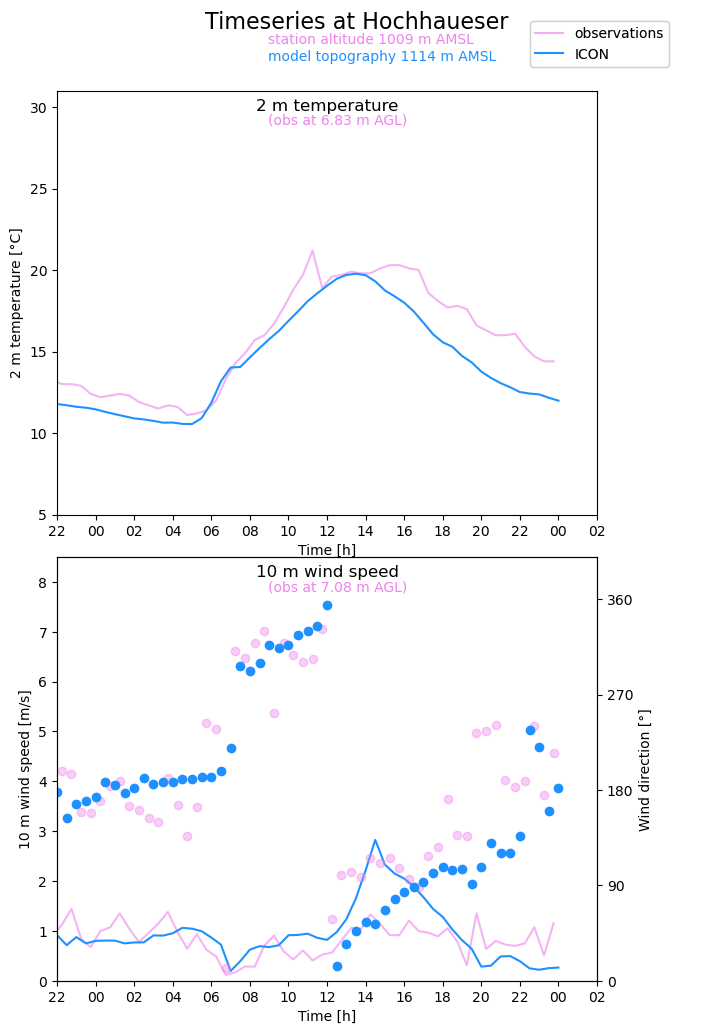

In [7]:
spvars_list=[vf.T_2M,vf.VEL_10M]

# figure settings
fig, ax = plt.subplots(2,1, figsize=(8,10))
plt.subplots_adjust(bottom=0.01, right=0.8, top=0.9,hspace=0.1)
fig.suptitle('Timeseries at '+loc.name, fontsize=16)
ax[0].annotate('station altitude '+str(stat.alt)+' m AMSL', xy=(0.42,1.17),xytext=(0.39,1.11),xycoords=('axes fraction','axes fraction'),color='violet')
ax[0].annotate('model topography '+str(stat.iconalt)+' m AMSL', xy=(0.42,0.82),xytext=(0.39,1.07),xycoords=('axes fraction','axes fraction'),color='dodgerblue')
for ax_ts,spvar in zip(ax.flatten(),spvars_list):
        # OBS
        ax_ts.plot(ts_data_stat['dt'],np.transpose(ts_data_stat[spvar.name]),color='violet',alpha=0.6, label='observations')

        # ICON 
        ax_ts.plot(plotdates_model,ts_data_icon[spvar.name],color='dodgerblue',label='ICON')

        # plotting options
        ax_ts.set_ylim(spvar.min,spvar.max)
        ax_ts.set_xlim(startdate_plot,enddate_plot)
        # ax_ts.grid()
        ax_ts.set_title(spvar.title, y=1.0, pad=-14)
        ax_ts.set_xlabel('Time [h]')
        ax_ts.set_xticks(plotdates_plot)
        ax_ts.set_xticklabels(labels=[j.strftime('%H') for j in plotdates_plot])
        ax_ts.set_ylabel(spvar.title+' '+spvar.units)
        fig.legend(labels=('observations','ICON'),loc=(0.75,0.935))
        ax_ts.annotate('(obs at '+str(stat.hdict[spvar.name])+' m AGL)', xy=(0.40,0.92),xytext=(0.39,0.92),xycoords=('axes fraction','axes fraction'),color='violet')

        ##################################################################################################
        # ## DIR if VEL is plotted ##
        if spvar.name == 'VEL_10M':
                # plot
                ax_ts_2 = ax_ts.twinx()
                ax_ts_2.scatter(ts_data_stat['dt'],np.transpose(ts_data_stat['DIR_10M']),color='violet',alpha=0.4) # station obs
                ax_ts_2.scatter(plotdates_model,ts_data_icon['DIR_10M'],color='dodgerblue') # model

                # plotting options
                ax_ts_2.set_ylim(0,400)
                ax_ts_2.set_yticks(np.arange(0,365,90))
                ax_ts_2.set_ylabel('Wind direction [°]')
                ax_ts_2.set_xlim(startdate_plot,enddate_plot)
                ax_ts_2.set_xticks(plotdates_plot)
                ax_ts_2.set_xticklabels(labels=[j.strftime('%H') for j in plotdates_plot])

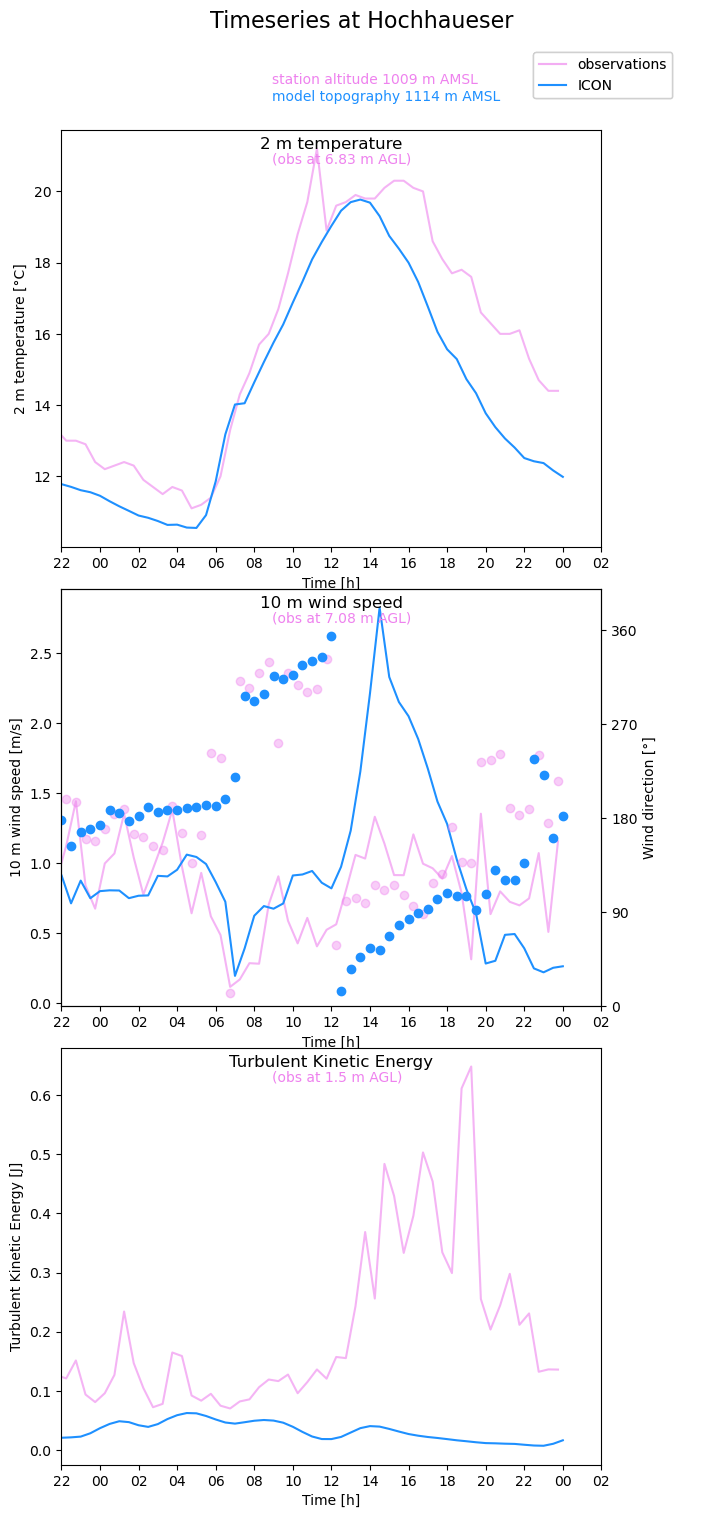

In [8]:
##  3 PLOTS T, wind, TKE
spvars_list=[vf.T_2M,vf.VEL_10M,vf.TKEs]
tke_icon_level = 78

# figure settings
fig, ax = plt.subplots(3,1, figsize=(8,15))
plt.subplots_adjust(bottom=0.01, right=0.8, top=0.9,hspace=0.1)
fig.suptitle('Timeseries at '+loc.name, fontsize=16)
ax[0].annotate('station altitude '+str(stat.alt)+' m AMSL', xy=(0.42,1.17),xytext=(0.39,1.11),xycoords=('axes fraction','axes fraction'),color='violet')
ax[0].annotate('model topography '+str(stat.iconalt)+' m AMSL', xy=(0.42,0.82),xytext=(0.39,1.07),xycoords=('axes fraction','axes fraction'),color='dodgerblue')
for ax_ts,spvar in zip(ax.flatten(),spvars_list):
        # OBS
        ax_ts.plot(ts_data_stat['dt'],np.transpose(ts_data_stat[spvar.name]),color='violet',alpha=0.6, label='observations')

        # ICON 
        if spvar.name == 'TKEs':
                ax_ts.plot(plotdates_model,ts_data_icon['TKE'+str(tke_icon_level)],color='dodgerblue',label='ICON')
        else:
                ax_ts.plot(plotdates_model,ts_data_icon[spvar.name],color='dodgerblue',label='ICON')

        # plotting options
        # ax_ts.set_ylim(spvar.min,spvar.max)
        ax_ts.set_xlim(startdate_plot,enddate_plot)
        # ax_ts.grid()
        ax_ts.set_title(spvar.title, y=1.0, pad=-14)
        ax_ts.set_xlabel('Time [h]')
        ax_ts.set_xticks(plotdates_plot)
        ax_ts.set_xticklabels(labels=[j.strftime('%H') for j in plotdates_plot])
        ax_ts.set_ylabel(spvar.title+' '+spvar.units)
        fig.legend(labels=('observations','ICON'),loc=(0.75,0.935))
        ax_ts.annotate('(obs at '+str(stat.hdict[spvar.name])+' m AGL)', xy=(0.40,0.92),xytext=(0.39,0.92),xycoords=('axes fraction','axes fraction'),color='violet')

        ##################################################################################################
        # ## DIR if VEL is plotted ##
        if spvar.name == 'VEL_10M':
                # plot
                ax_ts_2 = ax_ts.twinx()
                ax_ts_2.scatter(ts_data_stat['dt'],np.transpose(ts_data_stat['DIR_10M']),color='violet',alpha=0.4) # station obs
                ax_ts_2.scatter(plotdates_model,ts_data_icon['DIR_10M'],color='dodgerblue') # model

                # plotting options
                ax_ts_2.set_ylim(0,400)
                ax_ts_2.set_yticks(np.arange(0,365,90))
                ax_ts_2.set_ylabel('Wind direction [°]')
                ax_ts_2.set_xlim(startdate_plot,enddate_plot)
                ax_ts_2.set_xticks(plotdates_plot)
                ax_ts_2.set_xticklabels(labels=[j.strftime('%H') for j in plotdates_plot])

0.0341503513905677

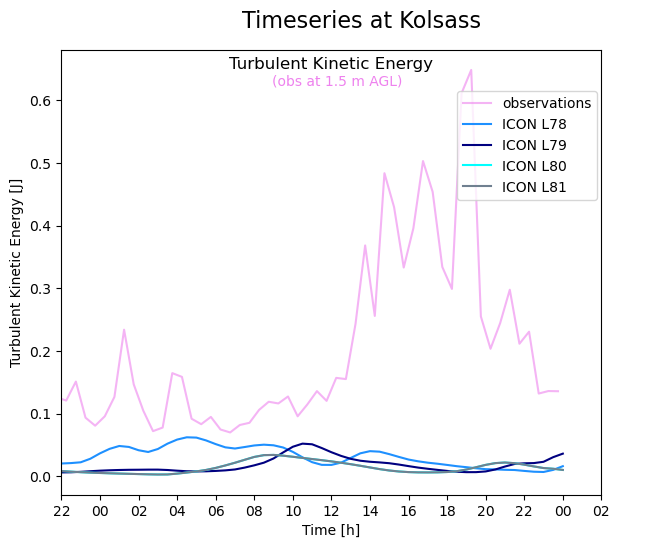

In [12]:
##  3 PLOTS TKE at different levels
spvar=vf.TKEs
loc=lf.kols

# figure settings
fig, ax_ts = plt.subplots(1,1, figsize=(8,5))
plt.subplots_adjust(bottom=0.01, right=0.8, top=0.9,hspace=0.1)
fig.suptitle('Timeseries at '+loc.name, fontsize=16)
ax[0].annotate('station altitude '+str(stat.alt)+' m AMSL', xy=(0.42,1.17),xytext=(0.39,1.11),xycoords=('axes fraction','axes fraction'),color='violet')
ax[0].annotate('model topography '+str(stat.iconalt)+' m AMSL', xy=(0.42,0.82),xytext=(0.39,1.07),xycoords=('axes fraction','axes fraction'),color='dodgerblue')

# OBS
ax_ts.plot(ts_data_stat['dt'],np.transpose(ts_data_stat[spvar.name]),color='violet',alpha=0.6, label='observations')

# ICON 
ax_ts.plot(plotdates_model,ts_data_icon['TKE'+str(78)],color='dodgerblue',label='ICON L78')
ax_ts.plot(plotdates_model,ts_data_icon['TKE'+str(79)],color='navy',label='ICON L79')
ax_ts.plot(plotdates_model,ts_data_icon['TKE'+str(80)],color='cyan',label='ICON L80')
ax_ts.plot(plotdates_model,ts_data_icon['TKE'+str(81)],color='slategray',label='ICON L81')

# plotting options
# ax_ts.set_ylim(spvar.min,spvar.max)
ax_ts.set_xlim(startdate_plot,enddate_plot)
# ax_ts.grid()
ax_ts.set_title(spvar.title, y=1.0, pad=-14)
ax_ts.set_xlabel('Time [h]')
ax_ts.set_xticks(plotdates_plot)
ax_ts.set_xticklabels(labels=[j.strftime('%H') for j in plotdates_plot])
ax_ts.set_ylabel(spvar.title+' '+spvar.units)
fig.legend(loc=(0.69,0.635))
ax_ts.annotate('(obs at '+str(stat.hdict[spvar.name])+' m AGL)', xy=(0.40,0.92),xytext=(0.39,0.92),xycoords=('axes fraction','axes fraction'),color='violet')

max(ts_data_icon['TKE'+str(80)])

KeyError: 'sw_down'

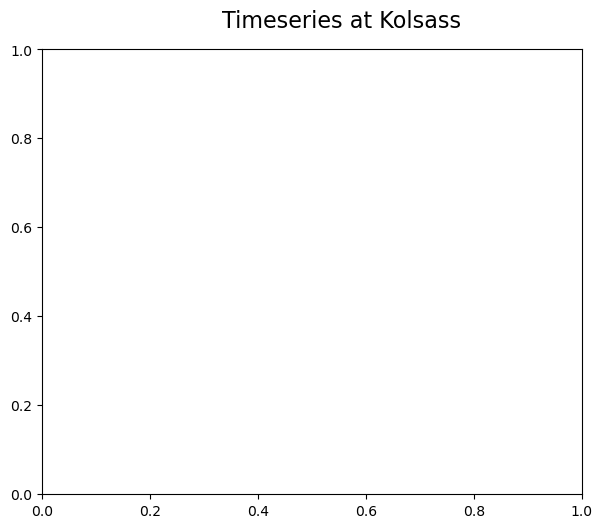

In [10]:
##  3 PLOTS TKE at different levels
spvar=vf.SW_d
loc = lf.kols_stat

# figure settings
fig, ax_ts = plt.subplots(1,1, figsize=(8,5))
plt.subplots_adjust(bottom=0.01, right=0.8, top=0.9,hspace=0.1)
fig.suptitle('Timeseries at '+loc.name, fontsize=16)
ax[0].annotate('station altitude '+str(stat.alt)+' m AMSL', xy=(0.42,1.17),xytext=(0.39,1.11),xycoords=('axes fraction','axes fraction'),color='violet')
ax[0].annotate('model topography '+str(stat.iconalt)+' m AMSL', xy=(0.42,0.82),xytext=(0.39,1.07),xycoords=('axes fraction','axes fraction'),color='dodgerblue')

# OBS
ax_ts.plot(ts_data_stat['dt'],np.transpose(ts_data_stat[spvar.name]),color='violet',alpha=0.6, label='observations')

# ICON 
ax_ts.plot(plotdates_model,ts_data_icon[spvar.name],color='dodgerblue')

# plotting options
# ax_ts.set_ylim(spvar.min,spvar.max)
ax_ts.set_xlim(startdate_plot,enddate_plot)
# ax_ts.grid()
ax_ts.set_title(spvar.title, y=1.0, pad=-14)
ax_ts.set_xlabel('Time [h]')
ax_ts.set_xticks(plotdates_plot)
ax_ts.set_xticklabels(labels=[j.strftime('%H') for j in plotdates_plot])
ax_ts.set_ylabel(spvar.title+' '+spvar.units)
fig.legend(loc=(0.69,0.635))
ax_ts.annotate('(obs at '+str(stat.hdict[spvar.name])+' m AGL)', xy=(0.40,0.92),xytext=(0.39,0.92),xycoords=('axes fraction','axes fraction'),color='violet')

In [ ]:
ts_data_stat

,T_2M,VEL_10M,DIR_10M,TKEs,timestamp,dt
rawdate,,,,,,
2019-09-12 12:15:00,17.8,1.6446,3.5137,0.3777,2019-09-12 12:15:00,2019-09-12 12:15:00
2019-09-12 12:45:00,18.4,1.1611,25.1089,0.3,2019-09-12 12:45:00,2019-09-12 12:45:00
2019-09-12 13:15:00,19.2,0.9031,47.469,0.2593,2019-09-12 13:15:00,2019-09-12 13:15:00
2019-09-12 13:45:00,19.9,0.6963,95.3714,0.1252,2019-09-12 13:45:00,2019-09-12 13:45:00
2019-09-12 14:15:00,20.2,1.2285,121.664,0.1429,2019-09-12 14:15:00,2019-09-12 14:15:00
...,...,...,...,...,...,...
2019-09-13 21:45:00,16.1,0.6983,183.122,0.2116,2019-09-13 21:45:00,2019-09-13 21:45:00
2019-09-13 22:15:00,15.3,0.748,188.692,0.2308,2019-09-13 22:15:00,2019-09-13 22:15:00
2019-09-13 22:45:00,14.7,1.0715,240.191,0.1321,2019-09-13 22:45:00,2019-09-13 22:45:00
